In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.DAPHNET)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
#force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-01-22 13:42:24,956 - whar-datasets - INFO - Running DownloadingStep
2026-01-22 13:42:24,962 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-01-22 13:42:24,966 - whar-datasets - INFO - Hash is up to date
2026-01-22 13:42:24,972 - whar-datasets - INFO - Running ParsingStep
2026-01-22 13:42:24,975 - whar-datasets - INFO - Checking hash for ParsingStep
2026-01-22 13:42:24,980 - whar-datasets - INFO - Hash is up to date
2026-01-22 13:42:24,982 - whar-datasets - INFO - Running WindowingStep
2026-01-22 13:42:24,986 - whar-datasets - INFO - Checking hash for WindowingStep
2026-01-22 13:42:24,993 - whar-datasets - INFO - Hash is up to date
2026-01-22 13:42:24,997 - whar-datasets - INFO - Loading windowing
2026-01-22 13:42:25,153 - whar-datasets - INFO - activity_ids from 0 to 2
2026-01-22 13:42:25,153 - whar-datasets - INFO - subject_ids from 0 to 9


In [4]:
# splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

fold_0 42528 10631 5907
fold_1 42528 10631 5907
fold_2 42528 10631 5907
fold_3 42528 10631 5907
fold_4 42528 10631 5907
fold_5 42528 10631 5907
fold_6 42528 10632 5906
fold_7 42528 10632 5906
fold_8 42528 10632 5906
fold_9 42528 10632 5906


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-01-22 13:42:25,836 - whar-datasets - INFO - Forcing recompute
2026-01-22 13:42:25,838 - whar-datasets - INFO - Running SamplingStep
2026-01-22 13:42:25,839 - whar-datasets - INFO - Checking hash for SamplingStep
2026-01-22 13:42:25,847 - whar-datasets - INFO - Hash is up to date


2026-01-22 13:42:47,142 - whar-datasets - INFO - Computing samples
2026-01-22 13:42:47,144 - whar-datasets - INFO - Getting normalization parameters
2026-01-22 13:42:50,779 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 120.42 s


2026-01-22 13:44:52,561 - whar-datasets - INFO - Saving samples
2026-01-22 13:44:54,287 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

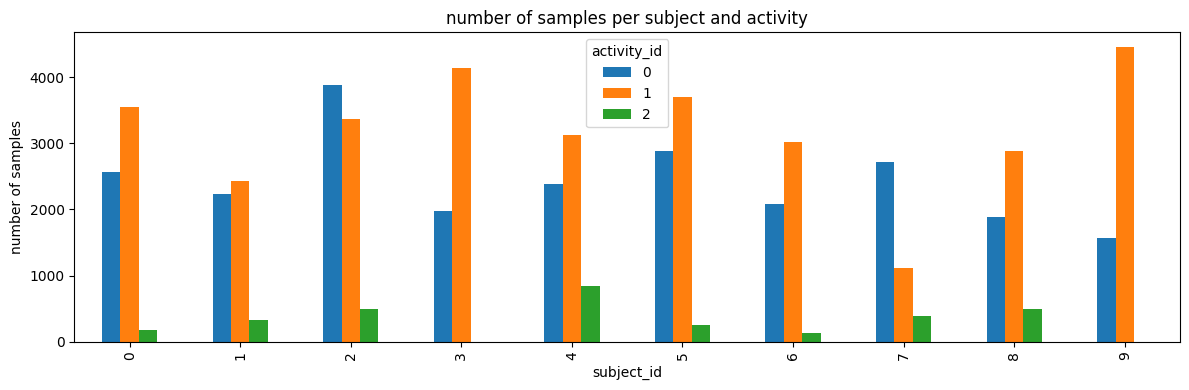

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: [2], Subject: 2')

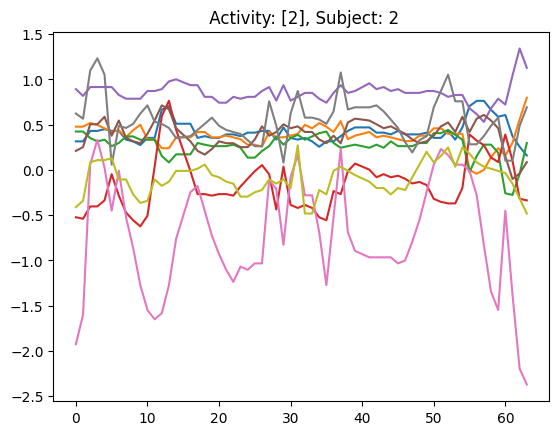

In [8]:
subject_id = 2
activity_id = 2

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")